In [3]:
# pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [5]:
# !streamlit run dashboards/basic_dashboard.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: dashboards/basic_dashboard.py


In [11]:
print(model.feature_names_in_)

['Temperature(C)' 'Humidity(%)' 'Wind speed (m/s)' 'Visibility (10m)'
 'Dew point temperature(C)' 'Solar Radiation (MJ/m2)' 'Rainfall(mm)'
 'Snowfall (cm)' 'Weekday' 'IsWeekend' 'Month' 'Seasons_Spring'
 'Seasons_Summer' 'Seasons_Winter' 'Holiday_No Holiday'
 'Functioning Day_Yes' 'PCA_1' 'PCA_2']


2025-08-05 19:51:13.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 19:51:13.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

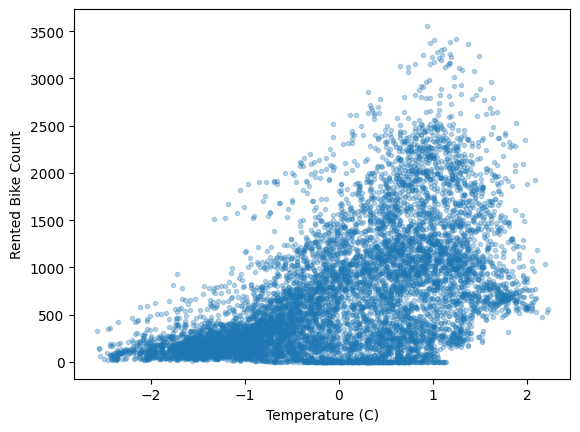

In [12]:
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load data and model
df = pd.read_csv("bike_rental_features.csv")
model = joblib.load("best_poly_model.pkl")

st.title("🚲 Florida Bike Rentals Forecast Dashboard")

# Sidebar Input Controls
st.sidebar.header("Input Values")
temp = st.sidebar.slider("Temperature (C)", -10.0, 40.0, 22.0)
humidity = st.sidebar.slider("Humidity (%)", 0, 100, 60)
wind_speed = st.sidebar.slider("Wind Speed (m/s)", 0.0, 10.0, 3.5)
visibility = st.sidebar.slider("Visibility (10m)", 0, 2000, 1000)
dew_point = st.sidebar.slider("Dew Point Temp (C)", -10.0, 30.0, 10.0)
solar_rad = st.sidebar.slider("Solar Radiation (MJ/m²)", 0.0, 5.0, 1.5)
rainfall = st.sidebar.slider("Rainfall (mm)", 0.0, 50.0, 2.0)
snowfall = st.sidebar.slider("Snowfall (cm)", 0.0, 10.0, 0.0)

weekday = st.sidebar.slider("Weekday (0=Monday ... 6=Sunday)", 0, 6, 2)
is_weekend = st.sidebar.selectbox("Is Weekend?", ["Yes", "No"])
month = st.sidebar.slider("Month", 1, 12, 8)

season = st.sidebar.selectbox("Season", ["Spring", "Summer", "Winter", "Autumn"])
holiday = st.sidebar.selectbox("Holiday", ["Holiday", "No Holiday"])
functioning_day = st.sidebar.selectbox("Functioning Day", ["Yes", "No"])

pca_1 = st.sidebar.slider("PCA_1", -5.0, 5.0, 0.0)
pca_2 = st.sidebar.slider("PCA_2", -5.0, 5.0, 0.0)

# Map categorical values to expected format
input_df = pd.DataFrame({
    "Temperature(C)": [temp],
    "Humidity(%)": [humidity],
    "Wind speed (m/s)": [wind_speed],
    "Visibility (10m)": [visibility],
    "Dew point temperature(C)": [dew_point],
    "Solar Radiation (MJ/m2)": [solar_rad],
    "Rainfall(mm)": [rainfall],
    "Snowfall (cm)": [snowfall],
    "Weekday": [weekday],
    "IsWeekend": [1 if is_weekend == "Yes" else 0],
    "Month": [month],
    "Seasons_Spring": [1 if season == "Spring" else 0],
    "Seasons_Summer": [1 if season == "Summer" else 0],
    "Seasons_Winter": [1 if season == "Winter" else 0],
    "Holiday_No Holiday": [1 if holiday == "No Holiday" else 0],
    "Functioning Day_Yes": [1 if functioning_day == "Yes" else 0],
    "PCA_1": [pca_1],
    "PCA_2": [pca_2]
})

# Prediction Output
prediction = model.predict(input_df)[0]
st.metric(label="📊 Predicted Rentals", value=int(prediction))

# Historical Overview
st.subheader("Historic Rental Patterns")
fig, ax = plt.subplots()
ax.plot(df["Temperature(C)"], df["Rented Bike Count"], '.', alpha=0.3)
ax.set_xlabel("Temperature (C)")
ax.set_ylabel("Rented Bike Count")
st.pyplot(fig)